# Meta-Heur√≠ticas : Trabalho Pr√°tico 1 

- Aym√™ Faustino dos Santos - 4704

O trabalho consiste em implementar duas meta-heur√≠ticas para minimizar duas fun√ß√µes objetivo, cada uma em dois intervalos diferentes, sendo o segundo, um intervado mais restrito contido no primeiro intervalo.

In [1]:
%matplotlib inline

## Bibliotecas Necessarias

In [2]:
import math
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## 1. Fun√ß√µes Objetivo 

### 1.1 Representa√ß√£o da Solu√ß√£o

Vamos utilizar um vetor para representar as vari√°veis de decis√£o. Na fun√ß√£o objetivo 1 ele ter√° tamanho dois pois temos duas variaveis de decis√£o po≈ïem na fun√ß√£o objetivo 2 temos quatro variaveis de decis√£o sendo assim ele ter√° tamanho quatro.

### 1.2 Fun√ß√£o Objetivo 1



1.2.1 Intervalos 

a) - 100 <= x1 e x2 <= 100

b) -20 <= x1 e x2 <= 20

In [3]:
def f(solucao):
    sum_sq = np.sum(np.square(solucao))
    raiz = np.sqrt(sum_sq)
    return 1 - np.cos(2 * np.pi * raiz) + 0.1 * raiz

intervalo1_a = [-100,100]
intervalo1_b = [-20,20]

1.2.2 Superficie

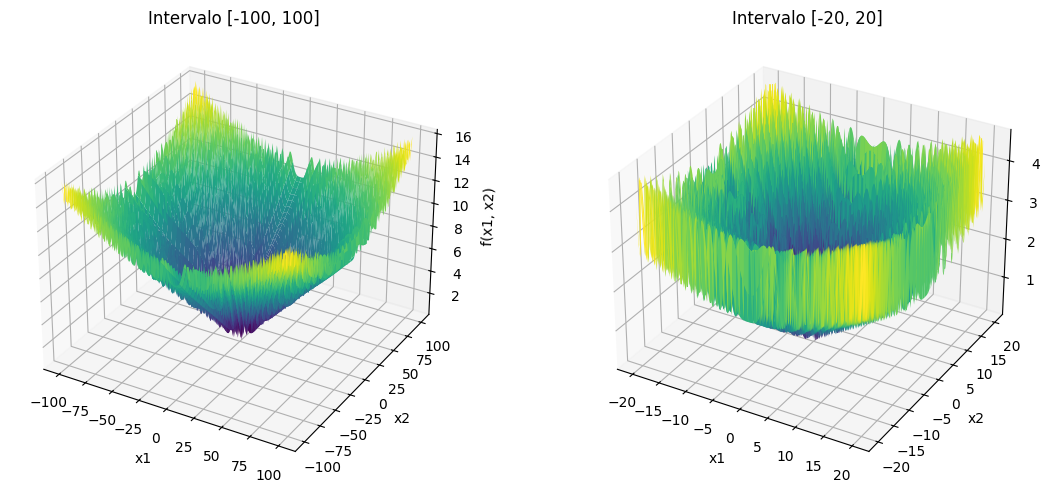

In [4]:
def plotar_superficies(intervalos, titulos):
    fig = plt.figure(figsize=(12, 5))  

    for i, (intervalo, titulo) in enumerate(zip(intervalos, titulos), start=1):
        x = np.linspace(intervalo[0], intervalo[1], 200)
        y = np.linspace(intervalo[0], intervalo[1], 200)
        X, Y = np.meshgrid(x, y)

        Z = np.array([[f([x_, y_]) for x_, y_ in zip(x_row, y_row)] 
                      for x_row, y_row in zip(X, Y)])

        ax = fig.add_subplot(1, 2, i, projection='3d')  # 1 linha, 2 colunas
        surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
        ax.set_title(titulo)
        ax.set_xlabel('x1')
        ax.set_ylabel('x2')
        ax.set_zlabel('f(x1, x2)')

    plt.tight_layout()
    plt.show()

intervalos = [(-100, 100), (-20, 20)]
titulos = ['Intervalo [-100, 100]', 'Intervalo [-20, 20]']
plotar_superficies(intervalos, titulos)

### 1.3 Fun√ß√£o Objetivo 2

1.3.1 Intervalos

a)‚àí10 ‚â§ ùë•1, ùë•2, ùë•3, ùë•4 ‚â§ 10

b)‚àí2 ‚â§ ùë•1, ùë•2, ùë•3, ùë•4 ‚â§ 2

In [5]:
def g(x):
    return (100 * (x[0]**2 - x[1])**2 +
            (x[0] - 1)**2 +
            (x[2] - 1)**2 +
            90 * (x[2]**2 - x[3])**2 +
            10.1 * ((x[1] - 1)**2 + (x[3] - 1)**2) +
            19.8 * (x[1] - 1) * (x[3] - 1))

intervalo2_a = [-10,10]
intervalo2_b = [-2,2]

1.3.2 Superficie

## 2. Meta-Heuristicas

Para minimiziar as fun√ß√µes objetivos vamos utilizar um algoritmo baseado em VNS (Variable Neighborhood Search) e um algoritmo baseado em #Escolher. Antes de implementar cada um deles vamos entender a ideia de cada uma dessas meta-heuristicas e quais decis√µes precisam ser tomadas em cada uma delas.

### 2.1 VNS (Variable Neighborhood Search) 

O Variable Neighborhood Search (VNS) √© uma metaheur√≠stica baseada na explora√ß√£o sistem√°tica de diferentes vizinhan√ßas para encontrar a solu√ß√£o √≥tima de um problema. A principal motiva√ß√£o do VNS √© evitar ficar preso em √≥timos locais, expandindo a busca para outras regi√µes do espa√ßo de solu√ß√µes.

Ele se baseia na seguinte ideia:
- Se uma solu√ß√£o √© um √≥timo local em uma vizinhan√ßa, ela pode n√£o ser em outra.
- Alternar entre diferentes vizinhan√ßas ajuda a escapar de √≥timos locais e encontrar melhores solu√ß√µes.

VNS √© eficiente, simples e vers√°til, sendo utilizado em problemas de otimiza√ß√£o combinat√≥ria e cont√≠nua.

#### 2.1.1 Pseudoc√≥digo do VNS B√°sico

Entrada: solu√ß√£o inicial `x`, n√∫mero m√°ximo de vizinhan√ßas `k_max`, n√∫mero m√°ximo de itera√ß√µes

1. x_best ‚Üê x

2. Para t = 1 at√© max_iter fa√ßa:

    3. k ‚Üê 1

    4. Enquanto k ‚â§ k_max fa√ßa:

        5.   Gerar x' na k-√©sima vizinhan√ßa de x_best

        6.   Aplicar busca local a partir de x', obtendo x''

        7.   Se f(x'') < f(x_best):

        8.       x_best ‚Üê x''

        9.       k ‚Üê 1   // reinicia vizinhan√ßa

        10.  Sen√£o:

        11.      k ‚Üê k + 1
        
12. Retornar x_best



Decis√µes importantes na implementa√ß√£o do VNS

- Solu√ß√£o Inicial
- Estrutura de Vizinhan√ßa
- Condi√ß√µes de Parada
- Estrat√©gia de Busca Local
- Quantidade de vizinhan√ßas (k_max)

### 2.1.2 Solu√ß√£o Inicial

Como a solu√ß√£o ser√° representada por meio de um vetor, uma estrat√©gia simples e muito utilizada na inicializa√ß√£o √© a de gerar uma solu√ß√£o aleat√≥ria preenchendo as posi√ß√µes do vetor com valores que estejam dentro de um intervalo pr√© definido para cada vari√°vel.

### 2.1.3 Metodo de busca local

#### Hill Climbing


O Hill Climbing √© um m√©todo de busca local que usa um procedimento de melhora iterativa, ou seja, a cada itera√ß√£o ele tenta melhorar a solu√ß√£o corrente sendo portanto um algoritmo gulosa que n√£o aceita piora. Seu algorimo para problemas de minimiza√ß√£o √©:

```
s --> solu√ß√£o candidata inicial
repita 
    r = perturba(copia(s)) --> faz uma perturba√ß√£o pequena na solu√ß√£o corrente para encontrar um nova solu√ß√£o
    se qualidade(r)<qualidade(s) ent√£o --> compara o valor da fun√ß√£o objetivo na nova solu√ß√£o com o da solu√ß√£o corrente
        s = r --> se melhoran atualiza solucao corrente
    --> se n√£o melhora n√£o faz nada
at√© condi√ß√£o de parada
retorne s
```

Analisando o algoritmo √© preciso definir:
* Como obter solu√ß√£o Inicial
* Como pertubarr uma solu√ß√£o
* Condi√ß√£o de Parada

#### Solu√ß√£o Inicial

Como o Hill Climbing vai ser utilizado como uma etapa do VNS a solu√ß√£o canditada vai ser definida no VNS.

#### Pertubar Solu√ß√£o

A caracter√≠stica do Hill Climbing √© de fazer pequenas pertuba√ß√µes na solu√ß√£o corrente e isso pode ser feito adicionando um pequeno valor aleat√≥rio, chamado de ru√≠do, em cada vari√°vel de decis√£o. Entretanto, saber se √© uma pertuba√ß√£o pequena √© um desafio. Uma poss√≠vel estrat√©gia √© fazer um ru√≠do de no m√°ximo 5% em rela√ß√£o ao valor corrente.

Ser√° utilizado um algoritmo que recebe o intervalo da porcentagem do ru√≠do como par√¢metro e escolhe aleatoriamente uma valor desse intervalo. Isso permite que o m√©todo seja generalista uma vez que poder√° ser usado tamb√©m para fazer perturba√ß√µes maiores. O pseudoc√≥digo do algoritmo √©:

```
min = valor minimo desejado para um elemento do vetor
max = valor minimo desejado para um elemento do vetor

min_ruido = porcentagem m√≠nima do ru√≠do
max_ruido = porcentagem m√°xima do ru√≠do

v = quantidade de variaveis de decisao
vetor[v] = solucao a ser perturbada

p = probabilidade de adicionar ru√≠do em um elemento do vetor (normalmente 1)

for i from 1 to v do --> para cada elemento do vetor de vari√°veis
    if p ‚â• numero aleatorio [0.0,1.0] entao
        do
            porcentagem_ruido = numero aleatorio [min_ruido, max_ruido]
            ruido = solucao[i] * porcentagem_ruido
            r = numero aleatorio [-ruido,ruido] --> pode ser um valor positivo ou negativo
        while min ‚â§ vetor[i] + r ‚â§ max --> conferir se continua atendendo √†s restri√ß√µes ap√≥s a perturba√ß√£o
        vetor[i] = vetor[i] + r
return vetor
```

Para as pequenas pertuba√ß√µes vamos utilizar um ruido de 3% a 5%

#### Condi√ß√£o de parada

Existem v√°rias estrat√©gias que podem ser adotadas como condi√ß√£o de parada, como:
* certa quantidade de itera√ß√µes realizadas
* certa quantidade de avalia√ß√µes da fun√ß√£o objetivo realizadas
* limite de tempo gasto
* certo n√∫mero de itera√ß√µes sme melhoria da solu√ß√£o atual

Na implementa√ß√£o do Hill Climbing o crit√©rio de parada ser√° realizar 5 itera√ß√µes sem melhoria da solu√ß√£o atual 

### 2.1.4 Gerar solu√ß√£o inicial aleatoria

In [6]:
def solucaoInicialAleatoria(min, max, qtdVariaveisDecisao=2):
    v = []
    for i in range(qtdVariaveisDecisao):
        v.append(random.uniform(min[i], max[i]))
    return np.array(v)

### 2.1.5 Gerar pertuba√ß√µes 

In [7]:
def pertubacao(solucao, min, max, min_ruido, max_ruido):
    nova_solucao = []
    for i, valor in enumerate(solucao):
        ruido = random.uniform(min_ruido, max_ruido)
        # Perturba√ß√£o ajustada para o valor de cada vari√°vel
        perturbacao = valor + ruido * (random.uniform(min[i], max[i]) - valor)  # Para cada dimens√£o
        nova_solucao.append(perturbacao)
    return np.array(nova_solucao)

### 2.1.6 Hill Climbing 

In [8]:
def hillClimbing(solucao, funcaoObjetivo, min, max):
    min_ruido = 0.03
    max_ruido = 0.05
    semMudanca = 0

    while True:
        novaSolucao = pertubacao(solucao.copy(), min, max, min_ruido, max_ruido)
        
        if funcaoObjetivo(novaSolucao) < funcaoObjetivo(solucao): 
            solucao = novaSolucao
            semMudanca = 0
        else:
            semMudanca += 1
            
        if semMudanca == 5:
            break

    return solucao

### 2.1.7 VNS

In [9]:
def vns(funcaoObjetivo, min, max, qtdVariaveisDecisao=2, k_max=5, max_iter=100):
    solucao_inicial = solucaoInicialAleatoria(min, max, qtdVariaveisDecisao)
    
    solucao_corrente = solucao_inicial
    melhor_solucao = solucao_inicial
    melhor_valor = funcaoObjetivo(melhor_solucao)

    iteracoes_sem_melhora = 0

    while iteracoes_sem_melhora < 5:
        k = 1
        while k <= k_max:
            nova_solucao = solucao_corrente + np.random.uniform(-1, 1, size=solucao_corrente.shape)
            nova_solucao = hillClimbing(nova_solucao, funcaoObjetivo, min, max)
            valor_nova_solucao = funcaoObjetivo(nova_solucao)

            if valor_nova_solucao < melhor_valor:
                solucao_corrente = nova_solucao
                melhor_valor = valor_nova_solucao
                melhor_solucao = nova_solucao
                k = 1
                iteracoes_sem_melhora = 0
            else:
                k += 1

        if k > k_max:
            solucao_corrente = solucao_corrente + np.random.uniform(-1, 1, size=solucao_corrente.shape)

        iteracoes_sem_melhora += 1

    return melhor_solucao

#### Intervalo a

In [10]:
# Fun√ß√£o para executar o VNS
vns_1a = {'x1':[], 'x2':[], 'f(x1,x2)':[]} 

min = intervalo1_a[0]  # Definindo o limite inferior para x1 e x2
max = intervalo1_a[1]  # Definindo o limite superior para x1 e x2

for i in range(30):    
    solucao = vns(f, [min, min], [max, max])  # Solu√ß√£o gerada pelo VNS
    vns_1a['x1'].append(solucao[0])  # Adiciona o valor de x1
    vns_1a['x2'].append(solucao[1])  # Adiciona o valor de x2
    vns_1a['f(x1,x2)'].append(f(solucao))  # Calcula e armazena o valor da fun√ß√£o objetivo
    
print(vns_1a)

{'x1': [np.float64(0.05118194766614326), np.float64(-0.5774669750405719), np.float64(-0.9409198203658391), np.float64(-0.7099488887704193), np.float64(0.9088863915786334), np.float64(-0.979318543128459), np.float64(0.9134980662162783), np.float64(-0.35472106829867744), np.float64(-0.707335534970405), np.float64(-0.17467156051221688), np.float64(0.2697876532753727), np.float64(-0.0055816924902487575), np.float64(0.811251003494887), np.float64(0.046940772765652394), np.float64(-0.5955531949480666), np.float64(-0.975020556282995), np.float64(0.9599238146382365), np.float64(-0.3132923110776016), np.float64(-0.501645024480819), np.float64(-0.9019596976413599), np.float64(0.9739171147116304), np.float64(-0.9016235551252605), np.float64(0.9611484429907944), np.float64(-0.9260089764985426), np.float64(0.4444138067641188), np.float64(-0.5490293211203885), np.float64(0.990439603872471), np.float64(-0.961673996704884), np.float64(-0.9642920291639201), np.float64(0.640679817013835)], 'x2': [np.flo

#### Fun√ß√£o Auxiliar Para Plotar um Gr√°fico com o Valor Final da Fun√ß√£o Objetivo em cada Itera√ß√£o

In [11]:
def objetivoFinalCadaIteracao(valores, target, titulo):
    plt.figure(figsize=(15, 8))
    min_index = np.argmin(valores[target])  # Encontra o √≠ndice do melhor valor (m√≠nimo)
    
    # Plotar os valores da fun√ß√£o objetivo
    plt.plot(range(1, len(valores[target]) + 1), valores[target], linestyle='-', label=target, color='lightgreen')
    
    # Adicionar pontos no gr√°fico e exibir os valores
    for i in range(len(valores[target])):
        if i == min_index:
            # Para o melhor valor (m√≠nimo), destaca o ponto
            plt.scatter(i + 1, valores[target][i], color='lightgreen', marker='o')
            plt.text(i + 1, valores[target][i], f'{valores[target][i]:.6f}', fontsize=12, fontweight='bold', ha='center', va='bottom', color='purple')
            plt.text(i + 1, valores[target][i], f'x1 = {valores["x1"][i]:.4f} \nx2 = {valores["x2"][i]:.4f}', fontsize=10, fontweight='bold', ha='center', va='top', color='black')
        else:
            # Para os outros valores, n√£o destaca o ponto
            plt.scatter(i + 1, valores[target][i], color='lightgreen', marker='o')
            plt.text(i + 1, valores[target][i], f'{valores[target][i]:.6f}', fontsize=8, ha='center', va='center', color='black')
    
    # Configura√ß√µes do gr√°fico
    plt.xticks([i for i in range(1, len(valores[target]) + 1)])
    plt.xlabel('Execu√ß√µes')  # Altere para "Execu√ß√µes" ou o que fizer sentido
    plt.ylabel('Valor da fun√ß√£o objetivo')
    plt.title(f'Valor Final da Fun√ß√£o Objetivo em cada Execu√ß√£o do {titulo}')
    plt.legend()
    plt.grid(True)
    plt.show()


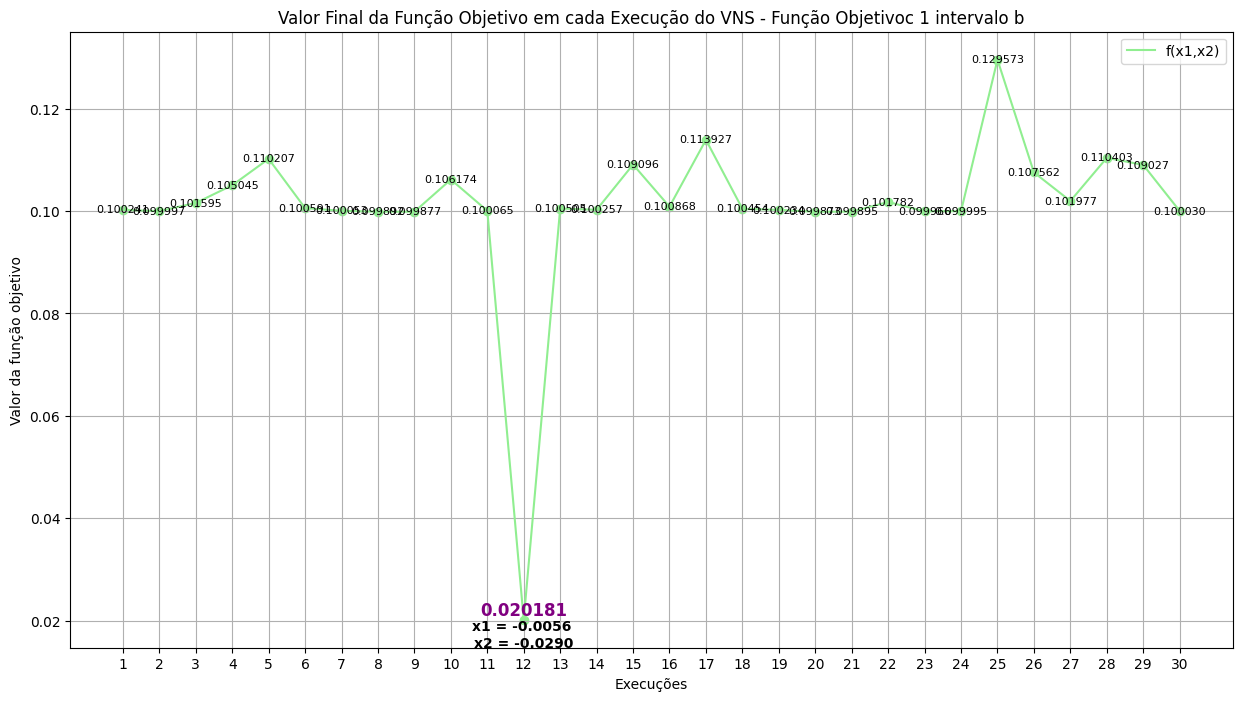

In [12]:
objetivoFinalCadaIteracao(vns_1a, 'f(x1,x2)', 'VNS - Fun√ß√£o Objetivoc 1 intervalo b')

#### Intervalo B

In [13]:
vns_1b = {'x1':[], 'x2':[], 'f(x1,x2)':[]} 

min = intervalo1_b[0] 
max = intervalo1_b[1] 

for i in range(30):    
    solucao = vns(f, [min, min], [max, max])
    vns_1b['x1'].append(solucao[0]) 
    vns_1b['x2'].append(solucao[1])  
    vns_1b['f(x1,x2)'].append(f(solucao)) 
    
print(vns_1b)

{'x1': [np.float64(-0.8773517071032519), np.float64(0.0207895678264578), np.float64(0.8685562428080307), np.float64(0.8852794318998728), np.float64(-0.9544956015575164), np.float64(0.18743007473181328), np.float64(0.6028620181104891), np.float64(0.01463452219078426), np.float64(0.9542454403149894), np.float64(0.9944176702731256), np.float64(0.03235397489816216), np.float64(-0.010188447892522268), np.float64(0.033630517298011364), np.float64(-0.03431593964467572), np.float64(-0.9606351076672208), np.float64(0.879993234151388), np.float64(0.027367877154954368), np.float64(-0.009385224533540626), np.float64(-0.9977227802784352), np.float64(-0.17912535794434237), np.float64(-0.03037160876397793), np.float64(0.6246055656826365), np.float64(0.026772280756523992), np.float64(0.04984931930272278), np.float64(0.6489683339546308), np.float64(-0.6912636967682358), np.float64(0.05738125823836887), np.float64(0.9687426921446989), np.float64(-0.00530547574921858), np.float64(-0.09962343650899463)], 

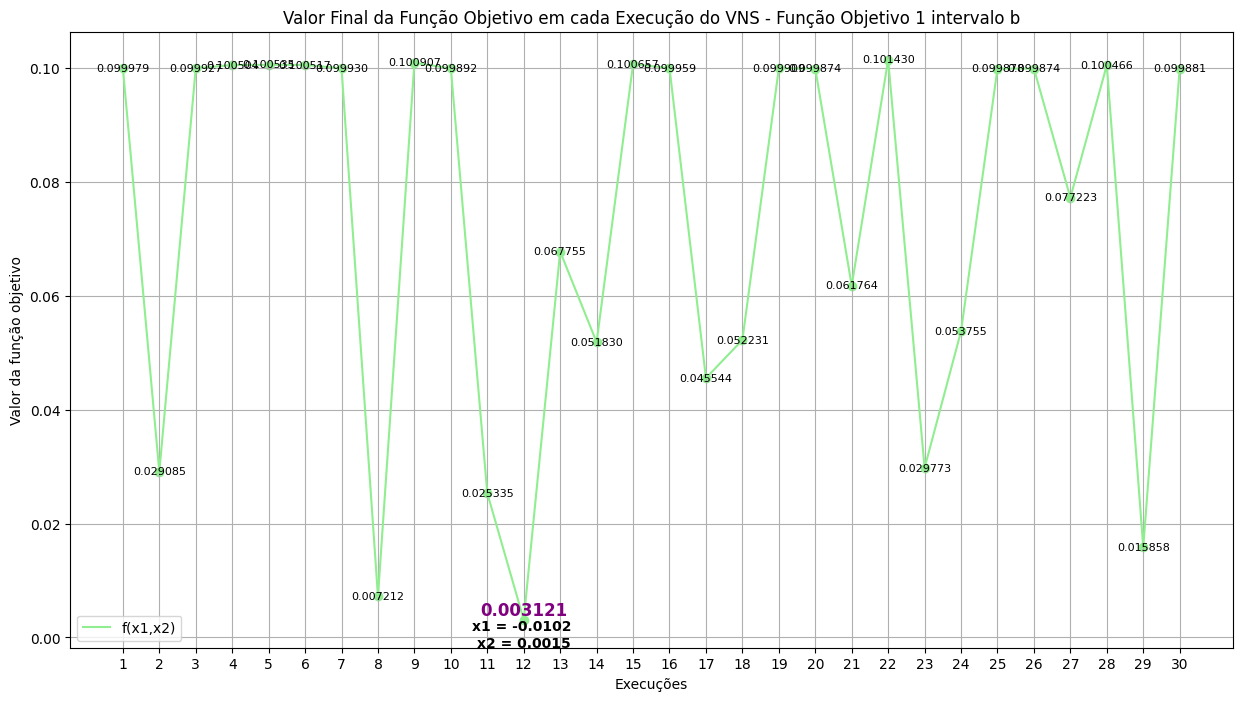

In [14]:
objetivoFinalCadaIteracao(vns_1b, 'f(x1,x2)', 'VNS - Fun√ß√£o Objetivo 1 intervalo b')

#### Fun√ß√£o para exibir o boxplot

In [15]:
def exibirBoxplot(resultadosComparar, titulo, cor):
    fig, ax = plt.subplots(figsize=(6, 4))

    sns.boxplot(y=resultadosComparar, ax=ax, color=cor)

    ax.set_title('VNS', fontsize=10, fontweight='bold')
    ax.set_ylabel('Valor da Fun√ß√£o Objetivo', fontsize=10)

    fig.suptitle(titulo, fontsize=12, fontweight='bold')

    plt.show()

    #quando tiver os dois algoritmos 

    """def exibirBoxplot(resultadosComparar, titulo, cor):
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

    sns.boxplot(y=resultadosComparar[0], ax=ax1, color=cor)
    sns.boxplot(y=resultadosComparar[1], ax=ax2, color=cor)

    ax1.set_title('SA', fontsize=10, fontweight='bold')
    ax1.set_ylabel('Valor da Fun√ß√£o Objetivo', fontsize=10)
    ax2.set_title('ILS', fontsize=10, fontweight='bold')
    
    fig.suptitle(titulo, fontsize=10, fontweight='bold')

    plt.show()"""

#### Fun√ß√£o para gerar as estatisticas

In [16]:
def estatisticas(resultadosComparar, nome_funcao_objetivo):
    estatisticas = {'algoritmo': [], 'minimo': [], 'maximo': [], 'media': [], 'dp': [], 'x_do_minimo': [], 'y_do_minimo': []}
   
    algoritmos = ['VNS']  # Aqui s√≥ tem VNS, mas depois adicione SA se necess√°rio

    for i, resultado in enumerate(resultadosComparar):
        objetivo = resultado[nome_funcao_objetivo]
        estatisticas['algoritmo'].append(algoritmos[i])
        estatisticas['minimo'].append(np.min(objetivo))
        estatisticas['maximo'].append(np.max(objetivo))
        estatisticas['media'].append(np.mean(objetivo))
        estatisticas['dp'].append(np.std(objetivo))
        indice_minimo = np.argmin(objetivo)
        estatisticas['x_do_minimo'].append(resultado['x1'][indice_minimo])  # Para x1
        estatisticas['y_do_minimo'].append(resultado['x2'][indice_minimo])  # Para x2
    
    return pd.DataFrame(estatisticas)

  algoritmo    minimo   maximo     media        dp  x_do_minimo  y_do_minimo
0       VNS  0.003121  0.10143  0.074153  0.033317    -0.010188     0.001473


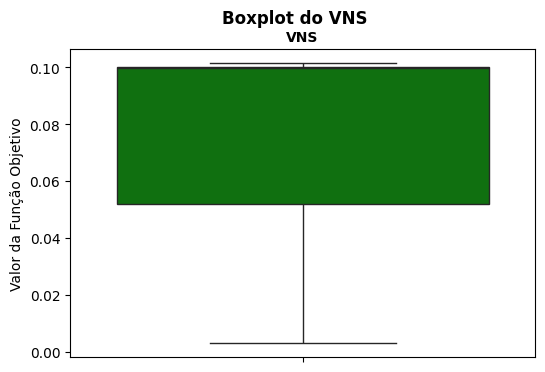

In [17]:
# Calcular as estat√≠sticas para o VNS e o SA posteriormente
estatisticas_vns = estatisticas([vns_1b], 'f(x1,x2)')

print(estatisticas_vns)

#resultadosComparar = [vns_1a['f(x1,x2)'], sa_1a['f(x,y)']]
exibirBoxplot(vns_1b['f(x1,x2)'], 'Boxplot do VNS', 'green')